In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Step 1 - Climate Analysis and Exploration

In [11]:
conn = engine.connect()
M = pd.read_sql("SELECT * FROM Measurement", conn)
M.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
S = pd.read_sql("SELECT * FROM Station", conn)
S

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


## Design a query to retrieve the last 12 months of precipitation data and plot the results


In [13]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
print(last_date)

('2017-08-23',)


In [14]:
query_date = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23 00:00:00


In [15]:
# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).filter(Measurement.date >= query_date.date()).all()
scores

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
s_df = pd.DataFrame(scores)
s_df.set_index('date', inplace=True)
s_df

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


In [17]:
# Sort the dataframe by date
s_date_sort = s_df.sort_values(by='date')
s_date_sort.head()

,prcp
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


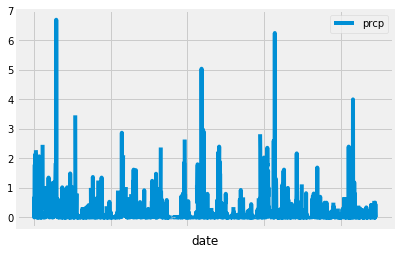

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

s_date_sort.plot(x_compat=True)
plt.show()

In [19]:

# date_sort.plot.bar()
# plt.tight_layout()
# plt.ylabel("Precipitation")
# plt.xlabel("Date")
# plt.legend(["Precipitation"])
# plt.grid(True)
# plt.xticks([])
# plt.show()



![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
s_date_sort.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

# Precipitation Analysis

In [21]:
# Design a query to show how many stations are available in this dataset?

session.query(func.count(Station.station)).all()

[(9)]

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# USC00519281

low_sel = [Measurement.station,
           func.min(Measurement.tobs)]
low_temp = session.query(*low_sel).\
    filter(Measurement.station == 'USC00519281').all()
low_temp


[('USC00519281', 54.0)]

In [24]:
high_sel = [Measurement.station,
           func.max(Measurement.tobs)]
high_temp = session.query(*high_sel).\
    filter(Measurement.station == 'USC00519281').all()
high_temp

[('USC00519281', 85.0)]

In [25]:
avg_sel = [Measurement.station,
           func.avg(Measurement.tobs)]
avg_temp = session.query(*avg_sel).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp

[('USC00519281', 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

date = dt.datetime(2016,8,23)
temp_sel = [Measurement.tobs]
yr_temp = session.query(*temp_sel).\
    filter(Measurement.date > date).\
    filter(Measurement.station == 'USC00519281').all()
yr_temp

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [27]:
df_yr_temp = pd.DataFrame(yr_temp, columns=['tobs'])
df_yr_temp.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


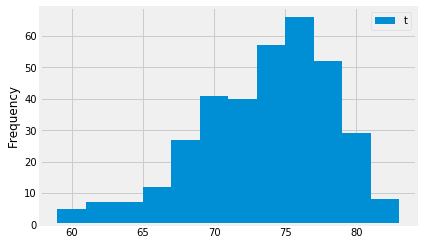

In [28]:
plt.hist(x=df_yr_temp.tobs, bins=12)
plt.ylabel('Frequency')
plt.tight_layout
plt.legend("topright")
plt.show()


![precipitation](Images/station-histogram.png)

# Optional - Temperature Analysis

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_start = dt.date(2018, 8, 1)
trip_end = dt.date(2018, 8, 12)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_start-last_year), (trip_end-last_year)))
print(temp_avg_lst_year)



[(71.0, 78.93478260869566, 83.0)]


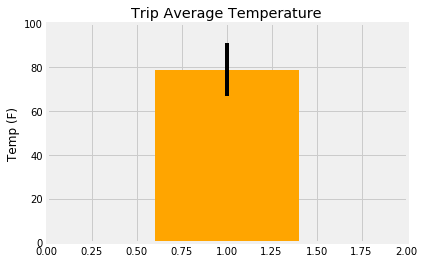

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'orange', yerr=p2p)
ax.set_xlabel(" ")
ax.set_ylabel("Temp (F)")
ax.set_title("Trip Average Temperature")

               
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()

In [38]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date= dt.date(2018,8,1)
end_date= dt.date(2018,8,12)
last_year = dt.timedelta(days=365)
start = start_date-last_year
end = end_date-last_year
trip_data = session.query(Measurement.date, Measurement.station, Station.name, Measurement.prcp, Station.latitude, Station.longitude, Station.elevation).filter(Measurement.date >= start).filter(Measurement.date <= end).order_by(Measurement.prcp.desc()).all()
trip_data

[('2017-08-08',
  'USC00516128',
  'WAIKIKI 717.2, HI US',
  0.34,
  21.2716,
  -157.8168,
  3.0),
 ('2017-08-08',
  'USC00516128',
  'KANEOHE 838.1, HI US',
  0.34,
  21.4234,
  -157.8015,
  14.6),
 ('2017-08-08',
  'USC00516128',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.34,
  21.5213,
  -157.8374,
  7.0),
 ('2017-08-08',
  'USC00516128',
  'PEARL CITY, HI US',
  0.34,
  21.3934,
  -157.9751,
  11.9),
 ('2017-08-08',
  'USC00516128',
  'UPPER WAHIAWA 874.3, HI US',
  0.34,
  21.4992,
  -158.0111,
  306.6),
 ('2017-08-08',
  'USC00516128',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.34,
  21.33556,
  -157.71139,
  19.5),
 ('2017-08-08',
  'USC00516128',
  'WAIHEE 837.5, HI US',
  0.34,
  21.45167,
  -157.84888999999998,
  32.9),
 ('2017-08-08',
  'USC00516128',
  'HONOLULU OBSERVATORY 702.2, HI US',
  0.34,
  21.3152,
  -157.9992,
  0.9),
 ('2017-08-08',
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  0.34,
  21.3331,
  -157.8025,
  152.4),
 ('2017-08-02',
  'USC00516128',


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
